In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bike_df = pd.read_csv("day.csv")

## 1. Data Understanding

In [3]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Check null values
round(100*(bike_df.isnull().sum()/len(bike_df.index)),2).sort_values(ascending=True)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [6]:
bike_df.shape

(730, 16)

In [7]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 2. Data cleaning and manipulation

In [8]:
#convert date with object type to date.
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'],dayfirst=True)

In [9]:
# Exploring the data.. 
# List the number of unique values in the format column, unique values if the values are less.
for col in bike_df.columns:
    print(col,bike_df[col].nunique())
    if bike_df[col].nunique()<10:
        print(bike_df[col].value_counts())

instant 730
dteday 730
season 4
3    188
2    184
1    180
4    178
Name: season, dtype: int64
yr 2
0    365
1    365
Name: yr, dtype: int64
mnth 12
holiday 2
0    709
1     21
Name: holiday, dtype: int64
weekday 7
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
workingday 2
1    499
0    231
Name: workingday, dtype: int64
weathersit 3
1    463
2    246
3     21
Name: weathersit, dtype: int64
temp 498
atemp 689
hum 594
windspeed 649
casual 605
registered 678
cnt 695


Conclusion: instant is an identifier column, can be removed.

In [10]:
bike_df.drop('instant',axis=1,inplace=True)

<AxesSubplot:>

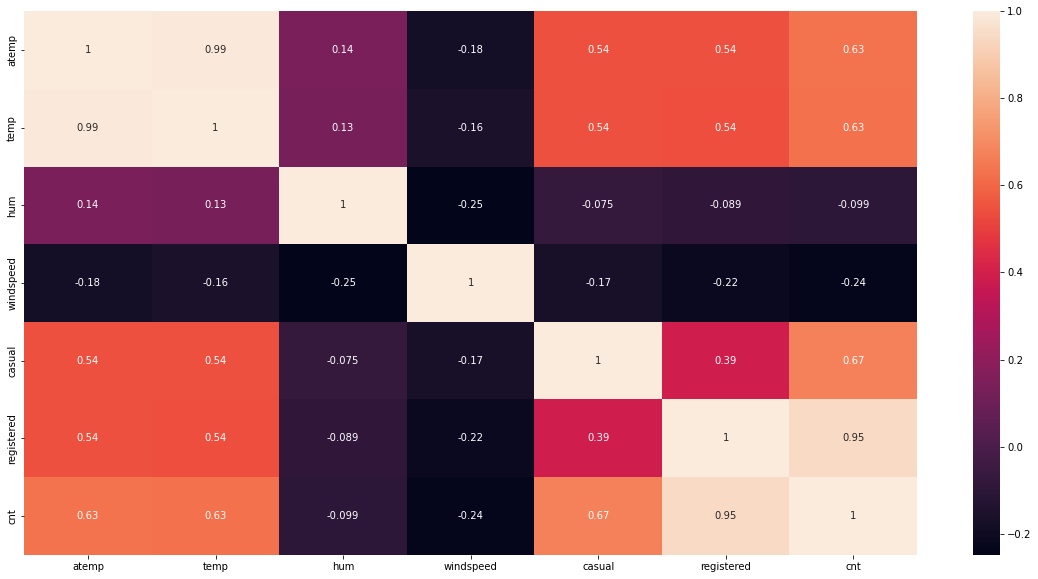

In [11]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(bike_df[['atemp','temp','hum','windspeed','casual','registered','cnt']].corr(),annot=True)

#### Observation: temp and atemp are highly correlated, One of the variables can be dropped.
#### Observation: Keeping the casual and registered might cause data leakage, so removing one of the variables

In [12]:
bike_v2=bike_df.drop(['temp','casual','registered'],inplace=True,axis=1)

<AxesSubplot:>

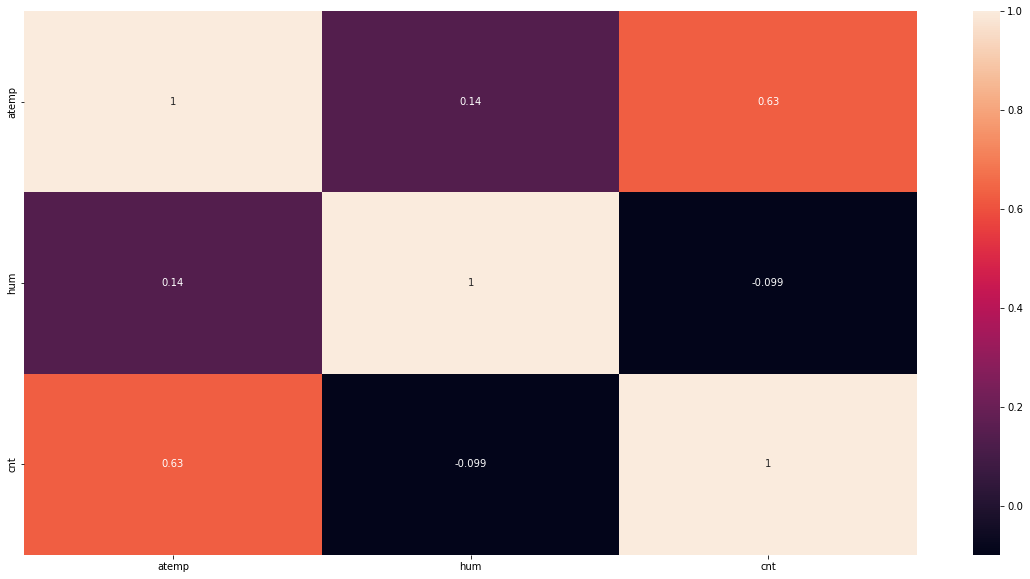

In [13]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(bike_df[['atemp','hum','cnt']].corr(),annot=True)

In [14]:
# Check outliers.. 



In [15]:
# Replace categorical values with string value.
bike_v2 = bike_df.copy()
bike_v2['season']=bike_df['season'].map({1:'SPRING',2:'SUMMER',3:'FALL',4:'WINTER'})
bike_v2.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,2018-01-01,SPRING,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,2018-01-02,SPRING,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,2018-01-03,SPRING,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,2018-01-04,SPRING,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,2018-01-05,SPRING,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [16]:
bike_v2['season'].value_counts()

FALL      188
SUMMER    184
SPRING    180
WINTER    178
Name: season, dtype: int64

In [17]:
# Replace categorical values with string value.
bike_v2['weathersit']=bike_df['weathersit'].map({1:'CLEAR',2:'MIST',3:'LIGHT_RAIN',4:'HEAVY_RAIN'})

In [18]:
bike_v2['weathersit'].value_counts()

CLEAR         463
MIST          246
LIGHT_RAIN     21
Name: weathersit, dtype: int64

In [19]:
bike_v2['mnth']=bike_df['mnth'].map({1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',
                                     8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'})
bike_v2['mnth'].value_counts()

JAN    62
MAR    62
MAY    62
JUL    62
AUG    62
OCT    62
DEC    62
APR    60
JUN    60
SEP    60
NOV    60
FEB    56
Name: mnth, dtype: int64

In [20]:
bike_v2['weekday']=bike_df['weekday'].map({0:'SUN',1:'MON',2:'TUE',3:'WED',4:'THU',5:'FRI',6:'SAT',7:'SUN'})
bike_v2['weekday'].value_counts()

SAT    105
SUN    105
MON    105
TUE    104
THU    104
FRI    104
WED    103
Name: weekday, dtype: int64

In [21]:
bike_v2['yr']=bike_v2['yr'].map({0:'YEAR_2018',1:'YEAR_2019'})
bike_v2.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,2018-01-01,SPRING,YEAR_2018,JAN,0,SAT,0,MIST,18.18125,80.5833,10.749882,985
1,2018-01-02,SPRING,YEAR_2018,JAN,0,SUN,0,MIST,17.68695,69.6087,16.652113,801
2,2018-01-03,SPRING,YEAR_2018,JAN,0,MON,1,CLEAR,9.47025,43.7273,16.636703,1349
3,2018-01-04,SPRING,YEAR_2018,JAN,0,TUE,1,CLEAR,10.60610,59.0435,10.739832,1562
4,2018-01-05,SPRING,YEAR_2018,JAN,0,WED,1,CLEAR,11.46350,43.6957,12.522300,1600


<AxesSubplot:xlabel='weekday'>

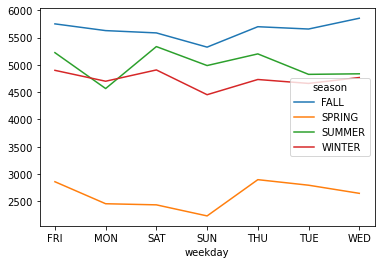

In [22]:
by_year_month = pd.pivot_table(bike_v2, values='cnt', index=['weekday'], columns=['season'], aggfunc=np.mean)
by_year_month.plot()

In [23]:
#Observation: During the spring the count of value is very low. compared to other seasons.

### Computing derived variables

In [24]:
# Deriving "days since the dataset started"
from datetime import date


d0 = date(2017, 12, 31)
d1 = date(2018 ,12, 31)
d2 = bike_df.dteday

#print(bike_df.dteday[0].year)
delta = d2.apply(lambda x:x.date()-d0 if x.date().year==2018 else x.date()-d1)
bike_v2['day']= delta
bike_v2['date'] = bike_df['dteday'].apply(lambda x:x.day)


In [25]:
# Cleaning days
bike_v2['day'] = bike_v2['day'].astype(str)
bike_v2['day'] = bike_v2['day'].map(lambda x: x[:-4])
bike_v2['day'] = bike_v2['day'].astype(int)

<AxesSubplot:title={'center':'Month/Season vs Average Count'}, xlabel='day'>

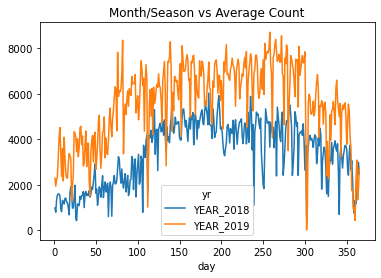

In [26]:
by_year_month = pd.pivot_table(bike_v2, values='cnt', index=['day'], columns=['yr'], aggfunc=np.mean)
by_year_month.plot(title = "Month/Season vs Average Count")

In [27]:
#Observation: This shows year by year there is a trend.. or peridocity associated

In [28]:
# Drop columns date
bike_v2.drop(['dteday'],axis = 1,inplace=True)

In [29]:
bike_v2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,day,date
0,SPRING,YEAR_2018,JAN,0,SAT,0,MIST,18.18125,80.5833,10.749882,985,1,1
1,SPRING,YEAR_2018,JAN,0,SUN,0,MIST,17.68695,69.6087,16.652113,801,2,2
2,SPRING,YEAR_2018,JAN,0,MON,1,CLEAR,9.47025,43.7273,16.636703,1349,3,3
3,SPRING,YEAR_2018,JAN,0,TUE,1,CLEAR,10.60610,59.0435,10.739832,1562,4,4
4,SPRING,YEAR_2018,JAN,0,WED,1,CLEAR,11.46350,43.6957,12.522300,1600,5,5


In [30]:
season = pd.get_dummies(bike_v2['season'],drop_first=True)
year = pd.get_dummies(bike_v2['yr'],drop_first=True)
month = pd.get_dummies(bike_v2['mnth'],drop_first=True)
#holiday = pd.get_dummies(bike_df['holiday'],drop_first=True)
weekday = pd.get_dummies(bike_v2['weekday'],drop_first=True)
#workingday = pd.get_dummies(bike_v2['workingday'],drop_first=True)
weathersit = pd.get_dummies(bike_v2['weathersit'],drop_first=True)
#date = pd.get_dummies(bike_df['date'],drop_first=True)

In [31]:
bike_v2 = pd.concat([bike_v2,season,month,year,weathersit,weekday],axis=1)
bike_v2.drop(['season','mnth','yr','weathersit','weekday','date'],axis = 1,inplace=True)

## 3. Split the model for training.

In [32]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bike_v2, train_size = 0.7, test_size = 0.3, random_state = 100)

## 4. Scale the model for training.

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bike_v2.head()
bike_v2.columns

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt', 'day',
       'SPRING', 'SUMMER', 'WINTER', 'AUG', 'DEC', 'FEB', 'JAN', 'JUL', 'JUN',
       'MAR', 'MAY', 'NOV', 'OCT', 'SEP', 'YEAR_2019', 'LIGHT_RAIN', 'MIST',
       'MON', 'SAT', 'SUN', 'THU', 'TUE', 'WED'],
      dtype='object')

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


C:\Users\idhay\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,holiday,workingday,atemp,hum,windspeed,cnt,day,SPRING,SUMMER,WINTER,...,SEP,YEAR_2019,LIGHT_RAIN,MIST,MON,SAT,SUN,THU,TUE,WED
653,0,1,0.501133,0.575354,0.300794,0.864243,289,0,0,1,...,0,1,0,0,0,0,0,0,1,0
576,0,1,0.766351,0.725633,0.264686,0.827658,212,0,0,0,...,0,1,0,0,0,0,0,0,1,0
426,0,0,0.438975,0.640189,0.255342,0.465255,62,1,0,0,...,0,1,0,1,0,1,0,0,0,0
728,0,0,0.200348,0.498067,0.663106,0.204096,364,1,0,0,...,0,1,0,0,0,0,1,0,0,0
482,0,0,0.391735,0.504508,0.188475,0.482973,118,0,1,0,...,0,1,0,1,0,1,0,0,0,0


In [35]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

C:\Users\idhay\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,holiday,workingday,atemp,hum,windspeed,cnt,day,SPRING,SUMMER,WINTER,...,SEP,YEAR_2019,LIGHT_RAIN,MIST,MON,SAT,SUN,THU,TUE,WED
184,1,0,0.778767,0.534223,0.149393,0.704300,185,0,0,0,...,0,0,0,1,1,0,0,0,0,0
535,0,1,0.855132,0.470417,0.231142,0.725421,171,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,0,1,0.492359,0.777843,0.443398,0.278853,300,0,0,1,...,0,0,0,1,0,0,0,1,0,0
221,0,1,0.805661,0.236659,0.449707,0.545512,222,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,1,0.749249,0.070765,0.682387,0.569148,153,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
y_train = df_train.pop('cnt')
X_train = df_train


In [37]:
y_test = df_test.pop('cnt')
X_test = df_test

In [38]:
#Recursive feature elimination

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\idhay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 15),
 ('SPRING', True, 1),
 ('SUMMER', False, 6),
 ('WINTER', True, 1),
 ('AUG', False, 7),
 ('DEC', False, 3),
 ('FEB', False, 4),
 ('JAN', True, 1),
 ('JUL', True, 1),
 ('JUN', False, 9),
 ('MAR', False, 14),
 ('MAY', False, 5),
 ('NOV', False, 2),
 ('OCT', False, 11),
 ('SEP', True, 1),
 ('YEAR_2019', True, 1),
 ('LIGHT_RAIN', True, 1),
 ('MIST', True, 1),
 ('MON', False, 8),
 ('SAT', True, 1),
 ('SUN', True, 1),
 ('THU', False, 12),
 ('TUE', False, 10),
 ('WED', False, 13)]

In [43]:
X_train.columns[rfe.support_]

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'SPRING',
       'WINTER', 'JAN', 'JUL', 'SEP', 'YEAR_2019', 'LIGHT_RAIN', 'MIST', 'SAT',
       'SUN'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['day', 'SUMMER', 'AUG', 'DEC', 'FEB', 'JUN', 'MAR', 'MAY', 'NOV', 'OCT',
       'MON', 'THU', 'TUE', 'WED'],
      dtype='object')

In [45]:
import statsmodels.api as sm  
X_train_rfe= sm.add_constant(X_train)
X_train_rfe.head()

C:\Users\idhay\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,holiday,workingday,atemp,hum,windspeed,day,SPRING,SUMMER,WINTER,...,SEP,YEAR_2019,LIGHT_RAIN,MIST,MON,SAT,SUN,THU,TUE,WED
653,1.0,0,1,0.501133,0.575354,0.300794,289,0,0,1,...,0,1,0,0,0,0,0,0,1,0
576,1.0,0,1,0.766351,0.725633,0.264686,212,0,0,0,...,0,1,0,0,0,0,0,0,1,0
426,1.0,0,0,0.438975,0.640189,0.255342,62,1,0,0,...,0,1,0,1,0,1,0,0,0,0
728,1.0,0,0,0.200348,0.498067,0.663106,364,1,0,0,...,0,1,0,0,0,0,1,0,0,0
482,1.0,0,0,0.391735,0.504508,0.188475,118,0,1,0,...,0,1,0,1,0,1,0,0,0,0


In [53]:
lm = sm.OLS(y_train,X_train_rfe[['const','holiday', 'atemp']]).fit()   # Running the linear model with seasons

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     183.9
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           8.70e-61
Time:                        15:35:32   Log-Likelihood:                 177.62
No. Observations:                 510   AIC:                            -349.2
Df Residuals:                     507   BIC:                            -336.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1667      0.020      8.331      0.000       0.127       0.206
holiday       -0.0720      0.048     -1.491      0.137      -0.167       0.023
atemp          0.6799      0.036     18.968      0.000       0.609       0.750
==============================================================================
Omnibus:                        3.265   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                2.781
Skew:                           0.085   Prob(JB):                        0.249
Kurtosis:                       2.680   Cond. No.                         7.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## Conclusion: Dropping holiday as it has low significance.
## Model 2: Constant, working day,atemp

In [54]:
lm2 = sm.OLS(y_train,X_train_rfe[['const','workingday', 'atemp']]).fit()   
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           9.41e-61
Time:                        15:35:44   Log-Likelihood:                 177.54
No. Observations:                 510   AIC:                            -349.1
Df Residuals:                     507   BIC:                            -336.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1489      0.022      6.733      0.000       0.105       0.192
workingday     0.0234      0.016      1.437      0.151      -0.009       0.055
atemp          0.6801      0.036     18.977      0.000       0.610       0.751
==============================================================================
Omnibus:                        2.952   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                2.628
Skew:                           0.094   Prob(JB):                        0.269
Kurtosis:                       2.703   Cond. No.                         7.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## Conclusion: Dropping holiday as it has low significance.
## Model 3: Constant, 'JAN','JUL','SEP',atemp

In [56]:
lm2 = sm.OLS(y_train,X_train_rfe[['const','atemp', 'JAN','JUL','SEP']]).fit()   # Running the linear model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     99.57
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           1.93e-62
Time:                        15:38:53   Log-Likelihood:                 186.79
No. Observations:                 510   AIC:                            -363.6
Df Residuals:                     505   BIC:                            -342.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1793      0.024      7.458      0.000       0.132       0.227
atemp          0.6712      0.045     15.031      0.000       0.583       0.759
JAN           -0.0764      0.030     -2.572      0.010      -0.135      -0.018
JUL           -0.0884      0.032     -2.804      0.005      -0.150      -0.026
SEP            0.0435      0.029      1.521      0.129      -0.013       0.100
==============================================================================
Omnibus:                        3.893   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                2.919
Skew:                           0.009   Prob(JB):                        0.232
Kurtosis:                       2.630   Cond. No.                         8.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Model 3: September is having low significance hence dropping.. Adding seasons

In [59]:
lm3 = sm.OLS(y_train,X_train_rfe[['const','atemp', 'JAN','JUL','SPRING','WINTER']]).fit()   # Adding seasons
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     89.18
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           4.25e-67
Time:                        15:40:33   Log-Likelihood:                 200.13
No. Observations:                 510   AIC:                            -388.3
Df Residuals:                     504   BIC:                            -362.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2044      0.037      5.483      0.000       0.131       0.278
atemp          0.6353      0.056     11.305      0.000       0.525       0.746
JAN           -0.0084      0.031     -0.268      0.789      -0.070       0.053
JUL           -0.0844      0.030     -2.785      0.006      -0.144      -0.025
SPRING        -0.0857      0.028     -3.114      0.002      -0.140      -0.032
WINTER         0.0454      0.021      2.118      0.035       0.003       0.088
==============================================================================
Omnibus:                        1.285   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.526   Jarque-Bera (JB):                1.294
Skew:                          -0.051   Prob(JB):                        0.524
Kurtosis:                       2.775   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Model 4: Jan is having low significance hence dropping.. Adding weather conditions.

In [60]:
lm4 = sm.OLS(y_train,X_train_rfe[['const','atemp','JUL','SPRING','WINTER','LIGHT_RAIN']]).fit()   # Running the linear model
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     108.2
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           1.81e-77
Time:                        15:43:31   Log-Likelihood:                 224.44
No. Observations:                 510   AIC:                            -436.9
Df Residuals:                     504   BIC:                            -411.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2183      0.035      6.268      0.000       0.150       0.287
atemp          0.6219      0.052     11.888      0.000       0.519       0.725
JUL           -0.0798      0.029     -2.768      0.006      -0.136      -0.023
SPRING        -0.0940      0.025     -3.707      0.000      -0.144      -0.044
WINTER         0.0559      0.020      2.747      0.006       0.016       0.096
LIGHT_RAIN    -0.2942      0.041     -7.106      0.000      -0.376      -0.213
==============================================================================
Omnibus:                        7.395   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                5.236
Skew:                           0.112   Prob(JB):                       0.0730
Kurtosis:                       2.557   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# All the variables have low significance and improves the overall model performance..So keeping everything.
# Model 5 : Adding days..

In [62]:
lm5 = sm.OLS(y_train,X_train_rfe[['const','atemp','JUL','SPRING','WINTER','LIGHT_RAIN','SAT', 'SUN']]).fit()   # Running the linear model
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     78.26
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           2.27e-76
Time:                        15:47:01   Log-Likelihood:                 226.65
No. Observations:                 510   AIC:                            -437.3
Df Residuals:                     502   BIC:                            -403.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.035      6.358      0.000       0.154       0.292
atemp          0.6213      0.052     11.899      0.000       0.519       0.724
JUL           -0.0774      0.029     -2.688      0.007      -0.134      -0.021
SPRING        -0.0934      0.025     -3.690      0.000      -0.143      -0.044
WINTER         0.0577      0.020      2.836      0.005       0.018       0.098
LIGHT_RAIN    -0.2980      0.041     -7.207      0.000      -0.379      -0.217
SAT            0.0032      0.019      0.165      0.869      -0.035       0.041
SUN           -0.0407      0.020     -2.022      0.044      -0.080      -0.001
==============================================================================
Omnibus:                        5.850   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                4.263
Skew:                           0.088   Prob(JB):                        0.119
Kurtosis:                       2.588   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Adding days decreases the model significance hence, removing those
# Model 6: Removing  days..Adding year, windspeed and humidity

In [64]:
lm6 = sm.OLS(y_train,X_train_rfe[['const','atemp','JUL','SPRING','WINTER','LIGHT_RAIN','hum', 'windspeed','YEAR_2019']]).fit()   # Running the linear model
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     282.8
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          2.43e-180
Time:                        15:49:26   Log-Likelihood:                 473.98
No. Observations:                 510   AIC:                            -930.0
Df Residuals:                     501   BIC:                            -891.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3719      0.032     11.637      0.000       0.309       0.435
atemp          0.5500      0.033     16.526      0.000       0.485       0.615
JUL           -0.0868      0.018     -4.846      0.000      -0.122      -0.052
SPRING        -0.1114      0.016     -7.128      0.000      -0.142      -0.081
WINTER         0.0523      0.013      4.096      0.000       0.027       0.077
LIGHT_RAIN    -0.1861      0.027     -6.994      0.000      -0.238      -0.134
hum           -0.2656      0.033     -8.093      0.000      -0.330      -0.201
windspeed     -0.1803      0.027     -6.672      0.000      -0.233      -0.127
YEAR_2019      0.2291      0.009     26.471      0.000       0.212       0.246
==============================================================================
Omnibus:                       61.380   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.953
Skew:                          -0.631   Prob(JB):                     7.45e-33
Kurtosis:                       5.318   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Verifying whether the all the factors we considered are okay.. and don't have high VIF
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train[X_train.columns[rfe.support_]]
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,41.67
13,SAT,10.16
14,SUN,9.84
2,atemp,3.11
5,SPRING,2.66
0,holiday,2.57
3,hum,1.91
6,WINTER,1.75
12,MIST,1.57
7,JAN,1.56


In [73]:
X_train.columns[rfe.support_]

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'SPRING',
       'WINTER', 'JAN', 'JUL', 'SEP', 'YEAR_2019', 'LIGHT_RAIN', 'MIST', 'SAT',
       'SUN'],
      dtype='object')

In [92]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
# After removing humidity and atemp
vif = pd.DataFrame()
X = X_train[['SPRING','WINTER','atemp','windspeed',
             'YEAR_2019','LIGHT_RAIN','MIST']]
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,windspeed,3.83
2,atemp,3.48
4,YEAR_2019,2.05
0,SPRING,1.62
6,MIST,1.49
1,WINTER,1.35
5,LIGHT_RAIN,1.08


In [96]:
lm7 = sm.OLS(y_train,X_train_rfe[['const','atemp','SPRING','MIST','WINTER','LIGHT_RAIN', 'windspeed','YEAR_2019']]).fit()   # Running the linear model
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     314.9
Date:                Mon, 10 Jan 2022   Prob (F-statistic):          4.11e-179
Time:                        17:30:52   Log-Likelihood:                 468.12
No. Observations:                 510   AIC:                            -920.2
Df Residuals:                     502   BIC:                            -886.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2674      0.025     10.676      0.000       0.218       0.317
atemp          0.4378      0.032     13.863      0.000       0.376       0.500
SPRING        -0.1268      0.016     -8.049      0.000      -0.158      -0.096
MIST          -0.0752      0.009     -8.149      0.000      -0.093      -0.057
WINTER         0.0368      0.013      2.882      0.004       0.012       0.062
LIGHT_RAIN    -0.2742      0.026    -10.507      0.000      -0.326      -0.223
windspeed     -0.1332      0.026     -5.033      0.000      -0.185      -0.081
YEAR_2019      0.2361      0.009     27.138      0.000       0.219       0.253
==============================================================================
Omnibus:                       73.861   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.872
Skew:                          -0.713   Prob(JB):                     3.97e-44
Kurtosis:                       5.715   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# compare 2 models with weather conditions and without , so that error terms can be analyzed.

In [97]:
y_train_count = lm7.predict(X_train_rfe[['const','atemp','SPRING','MIST','WINTER','LIGHT_RAIN', 'windspeed','YEAR_2019']])

C:\Users\idhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

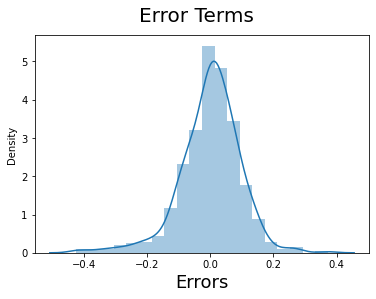

In [99]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [100]:
X_test_rfe= sm.add_constant(X_test)

C:\Users\idhay\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [113]:
y_test_count = lm7.predict(X_test_rfe[['const','atemp','SPRING','MIST','WINTER','LIGHT_RAIN', 'windspeed','YEAR_2019']])

Text(0, 0.5, 'y_pred')

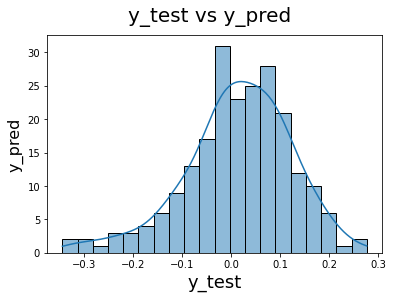

In [118]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.histplot(y_test- y_test_count,bins=20,kde=True)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)                        # X-label